In [61]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [62]:
dataset = load_iris()

In [63]:
X = dataset['data']

Y = np.zeros((len(dataset['target']), 3))
Y[np.arange(len(dataset['target'])), dataset['target']] = 1

X.shape, Y.shape

((150, 4), (150, 3))

In [64]:
train_x, test_x, train_y, test_y = [np.array(M.T) for M in train_test_split(X, Y, random_state=1)]
[m.shape for m in (train_x, test_x, train_y, test_y)]

[(4, 112), (4, 38), (3, 112), (3, 38)]

Shallow neural network, with one hidden layer and an output layer, using relu activation function for hidden layer and sigmoid activation for output layer.

$$
\mathbf{z} = \mathbf{w}\mathbf{x} + \mathbf{b}
$$

$$
\mathbf{a} = \frac{1}{1 + e^{-\mathbf{z}}}
$$

In [65]:
x = train_x[:,:1]
x

array([[ 6.5],
       [ 2.8],
       [ 4.6],
       [ 1.5]])

In [66]:
y = train_y[:,:1]
y

array([[ 0.],
       [ 1.],
       [ 0.]])

In [67]:
np.random.seed(1)
w = np.random.randn(y.shape[0], x.shape[0])
w

array([[ 1.62434536, -0.61175641, -0.52817175, -1.07296862],
       [ 0.86540763, -2.3015387 ,  1.74481176, -0.7612069 ],
       [ 0.3190391 , -0.24937038,  1.46210794, -2.06014071]])

In [156]:
b = np.zeros((y.shape[0], 1))
b

array([[ 0.],
       [ 0.],
       [ 0.]])

In [157]:
z = np.dot(w,x) + b
z

array([[ 4.80628391],
       [ 6.065165  ],
       [ 5.01100252]])

$$
\mathbf{z} = \
\mathbf{w}\mathbf{x} + \mathbf{b} = \
\begin{bmatrix}
1.62434536 & -0.61175641 & -0.52817175 & -1.07296862 \\
0.86540763 & -2.3015387 & 1.74481176 & -0.7612069 \\
0.3190391 & -0.24937038 & 1.46210794 & -2.06014071
\end{bmatrix} \
\begin{bmatrix}
6.5 \\ 2.8 \\ 4.6 \\ 1.5
\end{bmatrix} + \
\begin{bmatrix}
0 \\ 0 \\ 0
\end{bmatrix} = \
\begin{bmatrix}
4.80628391 \\ 6.065165 \\ 5.01100252
\end{bmatrix}
$$

$$
a = g(\mathbf{z}) = \sigma(\mathbf{z}) = \frac{1}{1 + e^{-\mathbf{z}}}
$$

In [69]:
sigmoid = lambda z: 1 / (1 + np.exp(-z))

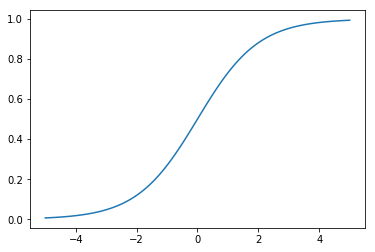

In [70]:
plt.plot(np.linspace(-5,5,100), sigmoid(np.linspace(-5,5,100)))
plt.show()

In [71]:
yHat = sigmoid(z)
yHat

array([[ 0.99188815],
       [ 0.99768301],
       [ 0.9933799 ]])

$$
a = g(\mathbf{z}) = \sigma(\mathbf{z}) = \sigma \Bigg( \
\begin{bmatrix}
4.80628391 \\ 6.065165 \\ 5.01100252
\end{bmatrix} \Bigg) = \
\begin{bmatrix}
0.99188815 \\ 0.99768301 \\0.9933799
\end{bmatrix} \neq \
\begin{bmatrix}
0.0 \\ 1.0 \\ 0.0
\end{bmatrix}
$$

$$
\mathcal{L}(\mathbf{y}, \mathbf{\hat{y}}) = -\sum_{i=1}^{c} \mathbf{y}_i\log{\mathbf{\hat{y}}_i} + (1-\mathbf{y}_i)\log{(1-\mathbf{\hat{y}}_i)}
$$

In [72]:
loss = lambda y, yHat: -np.sum((y * np.log(yHat) + (1-y) * np.log(1-yHat)))

In [73]:
# sanity check 1: should be small for close matches
loss(y, np.array([0.00001,0.99999,0.000001]).reshape(3,1))

2.1000100500604738e-05

In [74]:
# sanity check 2: should be large for poor matches
loss(y, np.array([0.99999,0.000001,0.99999]).reshape(3,1))

36.841361487913829

In [75]:
loss(y, yHat)

9.8343931585616957

## Derivatives

$$
\frac{\delta \mathcal{L}}{\delta \mathbf{w}} = \
\frac{\delta \mathcal{L}}{\delta \mathbf{\hat{y}}} \cdot \
\frac{\delta \mathbf{\hat{y}}}{\delta \mathbf{z}} \cdot \frac{\delta \mathbf{z}}{\delta \mathbf{w}} 
$$

$$
\frac{\delta \mathcal{L}}{\delta \mathbf{b}} = \
\frac{\delta \mathcal{L}}{\delta \mathbf{\hat{y}}} \cdot \
\frac{\delta \mathbf{\hat{y}}}{\delta z} \cdot \frac{\delta z}{\delta b} 
$$

$$
\frac{\delta \mathcal{L}}{\delta \mathbf{\hat{y}}} = \
\frac{\delta \mathcal{L}}{\delta \mathbf{a}} = \
- \frac{\delta}{\delta \mathbf{a}} \Big[ \
\mathbf{y}\log{\mathbf{a}} + (1-\mathbf{y})\log{(1-\mathbf{a})} \
\Big]
$$

$$
= \frac{-\mathbf{y}}{\mathbf{\hat{y}}} + \frac{1-\mathbf{y}}{1-\mathbf{\hat{y}}}
$$

## Derivative of Loss with respect to a

In [112]:
dLda = lambda y, yHat: - (y / yHat) + ((1-y) / (1-yHat))

In [113]:
da = dLda(y, yHat)
da

array([[ 123.27638239],
       [  -1.00232237],
       [ 151.05509388]])

In [114]:
def dLda_numeric(y, yHat):
    numeric = np.zeros(yHat.shape)
    epsilon = 1e-7
    for i, row in enumerate(yHat):
        for j, c in enumerate(row):
            plus = np.copy(yHat)
            minus = np.copy(yHat)
            plus[i,j] += epsilon
            minus[i,j] -= epsilon
            numeric[i,j] = (loss(y, plus) - loss(y, minus)) / (2 * epsilon)
    return numeric

In [115]:
da_numeric = dLda_numeric(y,yHat)
da_numeric

array([[ 123.27638233],
       [  -1.00232238],
       [ 151.05509381]])

In [121]:
distance = lambda a, b: np.sqrt(np.sum((a - b) ** 2))

In [123]:
distance(da, da_numeric)

9.2303476194109719e-08

## Derivative of Loss with respect to z

$$
\frac{\delta \mathbf{\hat{y}}}{\delta \mathbf{z}} = \
\frac{\delta}{\delta \mathbf{z}} \sigma(\mathbf{z}) = \
\frac{\delta}{\delta \mathbf{z}} \Bigg( \frac{1}{1 + e^{-\mathbf{z}}} \Bigg)
$$

$$
= \
\Big(\frac{-1}{1 + e^{-\mathbf{z}}}\Big)^{2} \cdot (e^{-\mathbf{z}}) \cdot -1 = \
\frac{e^{-\mathbf{z}}}{({1 + e^{-\mathbf{z}}})^2} 
$$

$$
= \frac{1 - 1 + e^{-\mathbf{z}}}{(1 + e^{-\mathbf{z}})(1 + e^{-\mathbf{z}})}  = \
\frac{1}{1 + e^{-\mathbf{z}}} \cdot \frac{1 - 1 + e^{-\mathbf{z}}}{1 + e^{-\mathbf{z}}}
$$

$$
= \
\frac{1}{1 + e^{-\mathbf{z}}} \Big(\frac{1}{1 + e^{-\mathbf{z}}} - \frac{1 + e^{-\mathbf{z}}}{1 + e^{-\mathbf{z}}}\Big)
$$

$$
= \sigma(\mathbf{z}) \big(1-\sigma(\mathbf{z})\big)
$$

$$
= \mathbf{\hat{y}}(1-\mathbf{\hat{y}})
$$

now for the cool part:


$$
\frac{\delta \mathcal{L}}{\mathbf{z}} = \
\frac{\delta \mathcal{L}}{\delta \mathbf{\hat{y}}} \cdot \
\frac{\delta \mathbf{\hat{y}}}{\delta \mathbf{z}}
$$

$$
= \Big( \frac{-\mathbf{y}}{\mathbf{\hat{y}}} + \frac{1-\mathbf{y}}{1-\mathbf{\hat{y}}} \Big)\
\mathbf{\hat{y}}(1-\mathbf{\hat{y}})
$$

$$
= \Big(\frac{-\mathbf{y}(1-\mathbf{\hat{y}}) + \mathbf{\hat{y}}(1-\mathbf{y})}{\mathbf{\hat{y}}(1-\mathbf{\hat{y}})} \Big)\
\mathbf{\hat{y}}(1-\mathbf{\hat{y}})
$$

$$
= -\mathbf{y}(1-\mathbf{\hat{y}}) + \mathbf{\hat{y}}(1-\mathbf{y}) 
$$

$$
= -\mathbf{y}+\mathbf{y}\mathbf{\hat{y}} + \mathbf{\hat{y}}-\mathbf{\hat{y}}\mathbf{y}
$$

$$
= \mathbf{\hat{y}} - \mathbf{y}
$$

Awesome news: we don't even need the dLda! can compute both steps in the chain in a single step here. Boom.

In [109]:
dLdz = lambda y, yHat: yHat - y

In [136]:
dz = dLdz(y,yHat)
dz

array([[ 0.99188815],
       [-0.00231699],
       [ 0.9933799 ]])

In [140]:
def dLdz_numeric(z, y, epsilon = 1e-7):
    numeric = np.zeros(z.shape)
    for i, row in enumerate(z):
        for j, c in enumerate(row):
            plus, minus = [np.copy(z), np.copy(z)]
            plus[i,j] += epsilon
            minus[i,j] -= epsilon
            numeric[i,j] = (loss(y, sigmoid(plus)) - loss(y, sigmoid(minus))) / (2 * epsilon)
    return numeric

In [141]:
dz_numeric = dLdz_numeric(z,y)
dz_numeric

array([[ 0.99188821],
       [-0.002317  ],
       [ 0.99337994]])

In [133]:
distance(dz, dz_numeric) 

7.2898331284372404e-08

## Derivative of loss with respect to w

$$
\frac{\delta \mathbf{z}}{\delta \mathbf{w}} = \
\frac{\delta}{\delta \mathbf{w}} \mathbf{w}\mathbf{x} + \mathbf{b} = \mathbf{x}
$$

$$
\frac{\delta \mathcal{L}}{\delta \mathbf{w}} = \
\frac{\delta \mathcal{L}}{\delta \mathbf{z}} \cdot \frac{\delta \mathbf{z}}{\delta \mathbf{w}} = \
\frac{\delta \mathcal{L}}{\delta \mathbf{z}} \cdot \mathbf{x}
$$

In [145]:
w.shape, da.shape, x.shape, 

((3, 4), (3, 1), (4, 1))

In [160]:
# need to transpose the x to get the shapes correct
dLdw = lambda dz, x: np.dot(dz, x.T)

In [161]:
dw = dLdw(dz, x)
dw

array([[  6.44727295e+00,   2.77728681e+00,   4.56268547e+00,
          1.48783222e+00],
       [ -1.50604601e-02,  -6.48758279e-03,  -1.06581717e-02,
         -3.47549078e-03],
       [  6.45696934e+00,   2.78146372e+00,   4.56954753e+00,
          1.49006985e+00]])

In [164]:
def dLdw_numeric(w,b,x,y, epsilon = 1e-7):
    numeric = np.zeros(w.shape)
    for i in range(w.shape[0]):
        for j in range(w.shape[1]):
            plus, minus = [np.copy(w), np.copy(w)]
            plus[i,j] += epsilon
            minus[i,j] -= epsilon
            numeric[i,j] = (loss(y, sigmoid(np.dot(plus,x) + b)) - loss(y, sigmoid(np.dot(minus,x) + b))) / (2 * epsilon)
    return numeric

In [165]:
dw_numeric = dLdw_numeric(w,b,x,y)
dw_numeric

array([[  6.44727294e+00,   2.77728668e+00,   4.56268543e+00,
          1.48783227e+00],
       [ -1.50604507e-02,  -6.48757492e-03,  -1.06581766e-02,
         -3.47548657e-03],
       [  6.45696936e+00,   2.78146365e+00,   4.56954752e+00,
          1.49006977e+00]])

In [166]:
distance(dw, dw_numeric) 

1.81564089107234e-07

## Derivative of Loss with respect to b


$$
\frac{\delta \mathbf{z}}{\delta \mathbf{b}} = \
\frac{\delta}{\delta \mathbf{b}} \mathbf{w}\mathbf{x} + \mathbf{b} = 1
$$

$$
\frac{\delta \mathcal{L}}{\delta \mathbf{b}} = \
\frac{\delta \mathcal{L}}{\delta \mathbf{z}} \cdot \frac{\delta \mathbf{z}}{\delta \mathbf{b}} = \
\frac{\delta \mathcal{L}}{\delta \mathbf{z}}
$$

In [167]:
dLdb = lambda dz: dz

In [168]:
db = dLdb(dz)
db

array([[ 0.99188815],
       [-0.00231699],
       [ 0.9933799 ]])

In [169]:
def dLdb_numeric(w,b,x,y, epsilon = 1e-7):
    numeric = np.zeros(b.shape)
    for i in range(b.shape[0]):
        for j in range(b.shape[1]):
            plus, minus = [np.copy(b), np.copy(b)]
            plus[i,j] += epsilon
            minus[i,j] -= epsilon
            numeric[i,j] = (loss(y, sigmoid(np.dot(w,x) + plus)) - loss(y, sigmoid(np.dot(w,x) + minus))) / (2 * epsilon)
    return numeric

In [170]:
db_numeric = dLdb_numeric(w,b,x,y)
db_numeric

array([[ 0.99188821],
       [-0.002317  ],
       [ 0.99337994]])

In [171]:
distance(db, db_numeric)

7.2898331284372404e-08

## Gradient decent

In [173]:
def forward(x,w,b):
    z = np.dot(w,x) + b
    a = sigmoid(z)
    return z, a

def backward(x, y, yhat):
    dz = yhat - y
    dw = np.dot(dz, x.T)
    db = dz
    return dw, db

In [184]:
epochs = 1000
alpha = 0.001
_w = np.copy(w)
_b = np.copy(b)
for i in range(epochs):
    z, a = forward(x,_w,_b)
    dw, db = backward(x,y,a)
    if (i % (epochs / 10) == 0): print("cost at iteration {}: {}".format(i, loss(y,a)))
    _w -= alpha * dw
    _b -= alpha * da

np.round(forward(x,_w,_b)[1])

cost at iteration 0: 9.834393158561696
cost at iteration 100: 0.002145277411514101
cost at iteration 200: 0.0018418749490632118
cost at iteration 300: 0.0016451870976112407
cost at iteration 400: 0.001471482798500676
cost at iteration 500: 0.0013176869921403098
cost at iteration 600: 0.0011812120786826466
cost at iteration 700: 0.00105986590493878
cost at iteration 800: 0.0009517801162295505
cost at iteration 900: 0.0008553536043709026


array([[ 0.],
       [ 1.],
       [ 0.]])

# Batch learning

# Hidden layer with ReLU